In [2]:
import os # path processing
from time import perf_counter # timer

# Function load data

In [3]:
def readFile(name_file):
    images = []
    for line in open(name_file).read():
        images.append(line)
    return images;

In [4]:
# This for loop is converting spaces into 0  and  # and + are getting converted into 1
def convertCharToNumber(arr_images):
    list_temp = []
    for char in arr_images:
        if char == ' ':
            list_temp.append(0)
        elif char == '+' or char == '#':
            list_temp.append(1)
        else:
            continue
    return list_temp

In [5]:
def getFeature(list_train_or_test):
    lis = list()
    image_arr = list()
    for index in range(0,len(list_train_or_test)):
        if index == len(list_train_or_test) - 1:
            lis.append(list_train_or_test[index])
            image_arr.append(lis)
        elif ( index % 784 ==0 and index!=0):
            image_arr.append(lis)
            lis = list() #new
            lis.append(list_train_or_test[index])
        else:
            lis.append(list_train_or_test[index])
    return image_arr

In [6]:
def getLabel(label_array):
  list_label = []
  for i in label_array:
    if i != '\n':
        list_label.append(int(i))
  return list_label


# File Loader
## Get feature

In [7]:
training_images = readFile("./Dataset/trainingimages")
list_training = convertCharToNumber(training_images)
img_arr_train= getFeature(list_training)


testing_images =  readFile("./Dataset/testimages")
list_testing = convertCharToNumber(testing_images)
img_arr_test = getFeature(list_testing)

## Get label

In [8]:
label_train = readFile("./Dataset/traininglabels")
lb_arr_train = getLabel(label_train)

label_test = readFile("./Dataset/testlabels")
lb_arr_test = getLabel(label_test)

In [9]:
lb_arr_train[:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

# Load and saving model system

In [10]:
# save the model to disk
import pickle # save train model
def save_model(obj, filename):
    filename = os.path.join(os.path.abspath('./SaveModel/'), filename + ".h")
    pickle_file = open(filename, 'wb')
    pickle.dump(obj, pickle_file)
    pickle_file.close()

def load_model(filename):
    file_path = os.path.join(os.path.abspath('./SaveModel/'), filename)
    loaded_model = pickle.load(open(file_path, 'rb'))
    return loaded_model

<h1 align='center'>Naive Bayes</h1>

# Giới thiệu về Naive Bayes
Naive Bayes classifiers là một thuật toán phân loại khá là nhanh và đơn giản, ý tưởng của thuật toán dựa trên định lý bayes mô tả xác suất của một label dựa trên các feature. Trong bài toán này, em sử dụng định lý bayes để tính toán xác suất mà một hình ảnh có thể thuộc về một lớp dựa trên giá trị của một đối tượng. Ý tưởng của nó là xác suất có điều kiện là khả năng xảy ra của sự kiện A dưa trên sự kiện B cho trước và được viết là P(A|B).
$$ P(A|B)\text{=}\frac{P(B|A)P(A)}{P(B)} $$

- Dựa vào công thức trên có thể xác định được xác suất của từ feature Fi, j có giá trị trong khoảng {0, 1} của label thuộc vào lớp {0, 1, 2, ..., 9}. <br>
- Để làm được điều này, chúng tôi sẽ đào tạo mô hình trên một tập hợp lớn các hình ảnh mà đã biết chúng thuộc các chữ số 0-9. Khi tính toán các xác  suất này, em sẽ có thể phân loại hình ảnh bằng cách tính lớp có xác suất cao nhất với feature đầu vào.


# Model



 

<b>Training </b> <br>
Mục tiêu của bước training là dạy cho máy tính khả năng xảy ra của một feature Fi,j có giá trị ƒ∈ {0, 1} thuộc vào class nào từ {0, 1,…,9}. Và có thể viết: <i> P(Fi,j= ƒ|class =c). </i> <br>
Sử dụng công thức: <br>
$$ P(Fi,j= ƒ |class =c)\text{=}\frac{\text{of times F(i,j)=f when class=c}}{\text{Total number of training examples where class=c}} $$
Khi sử dụng những xác suất này để tính toán, chúng ta phải bảo đảm được rằng P#0 vì nếu như P = 0 chúng sẽ loại bỏ mọi xác suất khác 0 khác, việc này dẫn đến kết quả phân loại không chính xác. Và chúng ta sẽ cần đến kỹ thuật Laplace Smoothing để làm điều này.  <br>
Kỹ thuật Laplace Smoothing là kỹ thuật xử lý vấn đề xác suất bằng không của Naive Bayes, hoạt động bằng cách thêm vào tử số một giá trị k nhỏ, dương và k.V vào mẫu số (trong trường hợp này chọn V = 2) <br>
$$ P(Fi,j= ƒ |class =c)\text{=}\frac{\text{k + of times F(i,j)=f when class=c}}{\text{2k + Total number of training examples where class=c}} $$
Cần tính thêm giá trị <b>Priors P(class =c): </b> Xác suất của mỗi class độc lập với các feature.
$$ P(class=c)\text{=}\frac{\text{of times F(i,j)=f when class=c}}{\text{of training examples }} $$


<b>Classifying</b> <br>
Sử dụng phương pháp maximum a posteriori (MAP) tính xác suất của mỗi hình ảnh ứng với một nhãn. Sau đó phân loại hình ảnh về xác suất cao nhất. <br>
Tính xác suất mà hình ảnh đó thuộc về lớp bằng cách nhân tất cả các xác suất với nhau và chia cho tập hợp xác suất. 
$$ \text{P(class) * P(f(1,1 ) |class) * P(f(1,2 ) |class) * …* P(f(28,28 ) |class)} $$
Nhưng khi sử dụng công thức này, chúng ta sẽ bị gặp phải một vấn đề là Floating point (dấu phẩy động) và dẫn đến underflow do khi nhân các xác suất lại với nhau nó sẽ có kết quả rất lớn.
Để giải quyết vấn đề này, em sẽ sử dụng công thức sau: 
$$ \text{log(P(class)) + log(P(f(1,1 ) |class)) + log(P(f(1,2 ) |class)) + …+ log(P(f(28,28 ) |class)))} $$

Xây dựng class Model giúp thuật tiện trong việc save model

In [11]:
from math import log
class Model:
  def __init__(self, k = 0.2):
    self.k = k #Laplace Smoothing
    self.priors = []
    self.number_of={}
    self.P_zerosfor = {}
    self.P_onesfor = {}

  def fit(self, X_train, y_train, X_test, y_test):
    self.n_classes = self.numberLabel(y_train)
    # Tính Prior từng class: Xác suất độc lập với Feature
    for c in range(self.n_classes):
      self.priors.append(y_train.count(c)/len(y_train))
    
    # Tính Likelihood
    for c in range(self.n_classes):
      new_array = []
      for i in range(0,len(y_train)):
        if y_train[i]==c:
          new_array.append(X_train[i])
      self.number_of[c] = new_array
    
    # Tính xác suất phân của features thuộc vào class c
    for c in range(self.n_classes):
      temp_zeros_array = []
      temp_ones_array = []
      for pixel in range(0,784):
        count_0 = 0
        count_1 = 0
        for each_image in self.number_of[c]:
          if each_image[pixel] == 0:
            count_0 = count_0 + 1
          elif each_image[pixel] == 1:
            count_1 = count_1 + 1
        prob_0=(self.k+count_0)/(2*self.k+len(self.number_of[c]))
        prob_1=(self.k+count_1)/(2*self.k+len(self.number_of[c]))
        temp_zeros_array.append(prob_0)
        temp_ones_array.append(prob_1)
      self.P_zerosfor[c] = temp_zeros_array
      self.P_onesfor[c] = temp_ones_array
    return self

  #Make prediction - highest probility is the prediction
  #postirior = likeihood * prior
  def predict(self, y_test):
    predicted_label = list()
    Log_P = {}
    for each_test_image in y_test:
      prob_image=[]
      for c in range(self.n_classes):
        Log_P[c] = log(self.priors[c])
        for index in range(0,len(each_test_image)):
          takeprob = 0
          if each_test_image[index] == 0:
            takeprob = self.P_zerosfor[c][index]
          elif each_test_image[index] == 1:
            takeprob = self.P_onesfor[c][index]
          Log_P[c]+=log(takeprob)  #fix floating point
        prob_image.append(Log_P[c])
      x = prob_image.index(max(prob_image))
      predicted_label.append(x)
    return predicted_label

  # đếm số label khác nhau
  def numberLabel(self, list_classes):
    unique_class = []
    count = 0
    for x in list_classes:
      if x not in unique_class:
        count += 1
        unique_class.append(x)
    return count
  
  # Predict label dựa theo 1 features trong tập X_test
  def checkModel(self, X_test):
    prob_image=[]
    Log_P = {}
    for c in range(self.n_classes):
      Log_P[c] = log(self.priors[c])
      for index in range(0,len(X_test)):
        takeprob = 0
        if X_test[index] == 0:
          takeprob = self.P_zerosfor[c][index]
        elif X_test[index] == 1:
          takeprob = self.P_onesfor[c][index]
        Log_P[c]+=log(takeprob)  #fix floating point
      prob_image.append(Log_P[c])
    x = prob_image.index(max(prob_image))
    return x


# Training Model và Save Model

In [13]:
model = Model(k=0.0005)
model.fit(img_arr_train, lb_arr_train, img_arr_test,lb_arr_test )

In [16]:
save_model(model, "train_full")

# Dự đoán label với tập X_test

In [14]:
predicted_label = model.predict(img_arr_test)

# Đánh giá mô hình

In [16]:
# Accuracy
def Acc(predicted_label, lb_arr_test):
  return len([i for i, j in zip(lb_arr_test, predicted_label) if i == j]) / len(lb_arr_test)

In [17]:
print(Acc(predicted_label, lb_arr_test))

0.794

# Load model từ file

In [19]:
model_k = load_model("train_full.h")

In [20]:
predicted_model_k = model_k.predict(img_arr_test)

In [26]:
model.checkModel(img_arr_test[16])

2

In [27]:
lb_arr_test[16]

2

# Tìm Laplace Smoothing sao cho accuracy tốt

In [28]:
# k_i = 0.1
Acc_k = {}
for i in range(0, 10, 1):
  print('Khi k = ', i)
  model = Model(k=i + 0.1)
  model.fit(img_arr_train, lb_arr_train, img_arr_test,lb_arr_test )
  predicted_label = model.predict(img_arr_test)
  Acc_k[i] = Acc(predicted_label, lb_arr_test)
  print('Acc: ' , Acc(predicted_label, lb_arr_test))

Khi k =  0.1
Acc:  0.793
Khi k =  1.1
Acc:  0.791
Khi k =  2.1
Acc:  0.785
Khi k =  3.1
Acc:  0.783
Khi k =  4.1
Acc:  0.781
Khi k =  5.1
Acc:  0.778
Khi k =  6.1
Acc:  0.778
Khi k =  7.1
Acc:  0.775
Khi k =  8.1
Acc:  0.775
Khi k =  9.1
Acc:  0.775


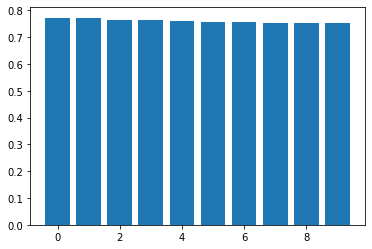

In [29]:
import matplotlib.pyplot as plt
plt.bar(*zip(*Acc_k.items()))
plt.show()

# Đánh giá bằng K-cross Validation

K-Fold CV là một phương pháp đánh giá model một cách chính xác khi chúng ta train model nhưng có quá ít dữ liệu.

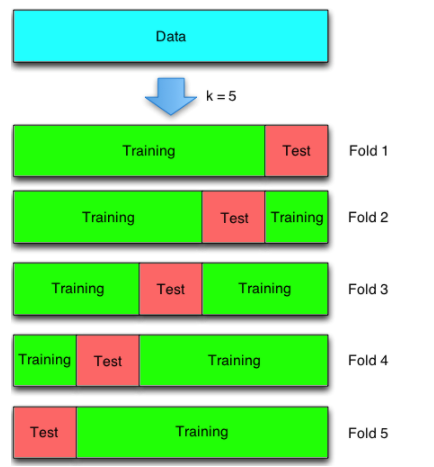

In [31]:
k = 10
accuracy_list = []
fold_idx = 1
n = (int) (len(img_arr_train)/k)
for i in range(0, len(img_arr_train), n):
  model = Model(k=0.1)
  X_val_k = img_arr_train[i:i+n]
  y_val_k = lb_arr_train[i:i+n]
  X_train_k = img_arr_train[:i] + img_arr_train[i+n:]
  y_train_k = lb_arr_train[:i] + lb_arr_train[i+n:]
  model.fit(X_train_k, y_train_k, img_arr_test,lb_arr_test )
  predicted_label = model.predict(X_val_k)
  accuracy_list.append(Acc(predicted_label, y_val_k))
  print("Đã train xong Fold ", fold_idx)
  # Sang Fold tiếp theo
  fold_idx = fold_idx + 1

Đã train xong Fold  1
Đã train xong Fold  2
Đã train xong Fold  3
Đã train xong Fold  4
Đã train xong Fold  5
Đã train xong Fold  6
Đã train xong Fold  7
Đã train xong Fold  8
Đã train xong Fold  9
Đã train xong Fold  10


Trong bài tập này, em chia thành 10 Folds, ý tưởng là mỗi fold sẽ lấy ra các phần tử theo index set để đưa vào train và val cho phù hợp. Kết quả accuracy sẽ được lưu lại vào một list để hiển thị và tính trung bình cộng.

In [32]:
# In kết quả tổng thể
import numpy as np
print('* Chi tiết các fold')
for i in range(0, len(accuracy_list)):
  print(f'> Fold {i+1} - Accuracy: {accuracy_list[i]}%')

print('* Đánh giá tổng thể các folds:')
print(f'> Accuracy: {np.mean(accuracy_list)} (Độ lệch +- {np.std(accuracy_list)})')

* Chi tiết các fold
> Fold 1 - Accuracy: 0.852%
> Fold 2 - Accuracy: 0.79%
> Fold 3 - Accuracy: 0.806%
> Fold 4 - Accuracy: 0.868%
> Fold 5 - Accuracy: 0.83%
> Fold 6 - Accuracy: 0.848%
> Fold 7 - Accuracy: 0.818%
> Fold 8 - Accuracy: 0.844%
> Fold 9 - Accuracy: 0.83%
> Fold 10 - Accuracy: 0.834%
* Đánh giá tổng thể các folds:
> Accuracy: 0.8320000000000001 (Độ lệch +- 0.021780725424099156)


# Confusionmatrix

In [33]:
def confusionmatrix(actual, predicted, normalize = False):
    unique = sorted(set(actual))
    matrix = [[0 for _ in unique] for _ in unique]
    imap   = {key: i for i, key in enumerate(unique)}
    # Generate Confusion Matrix
    for p, a in zip(predicted, actual):
        matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
    if normalize:
        sigma = sum([sum(matrix[imap[i]]) for i in unique])
        matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
    return matrix

In [32]:
cf_matrix = confusionmatrix(lb_arr_test, predicted_label)

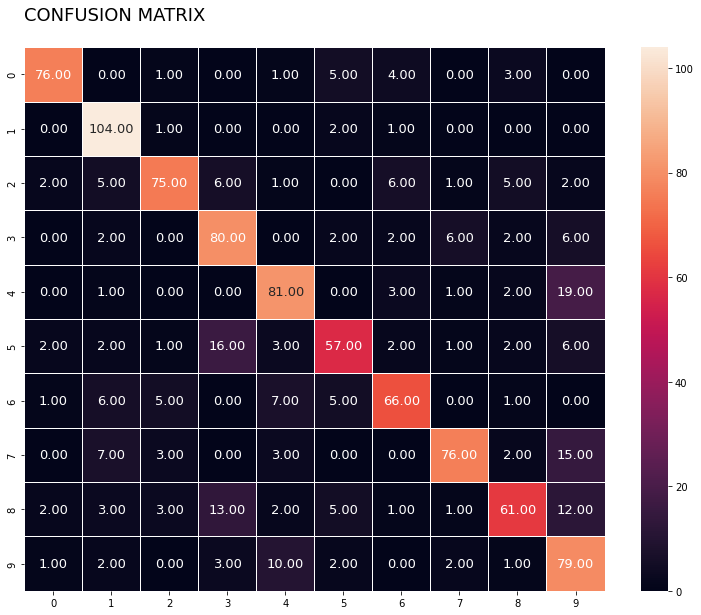

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(data=cf_matrix, annot=True, annot_kws={"fontsize":13}, fmt=".2f", 
            linecolor='white', linewidths=0.5);

title = 'CONFUSION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

Khi sử dụng 2 tập dữ liệu training và testing để đánh thuật toán ta được độ chính xác tổng thể là 78%. Nhìn vào confusion matrix ta có thấy một vài vị trí nhầm lẫn trong việc dự đoán nhãn. Ví dụ: (5, 3) ,(8,3) hay (4, 9)… là những vị trí có kết quả khá cao hay là bị nhầm lẫn cao.

# Accuracy of each digit

In [35]:
def AccOfClass(predict, val):
  return (len([i for i, j in zip(val, predict) if i == j]) / len(val))*100

In [36]:
acc_of = {}
predicted_label_of = {} 
for c in range(10):
  img_array = []
  lb_array = []
  for i in range(0,len(lb_arr_test)):
    if lb_arr_test[i]==c:
      img_array.append(img_arr_test[i])
      lb_array.append(lb_arr_test[i])
  predicted_label_of[c] = model.predict(img_array)
  acc_of[c] = AccOfClass(predicted_label_of[c], lb_array)

In [37]:
for c, pe in acc_of.items():
  print('Digit:',c , 'Accuracy: ', pe,'%')

Digit: 0 Accuracy:  84.44444444444444 %
Digit: 1 Accuracy:  96.29629629629629 %
Digit: 2 Accuracy:  72.81553398058253 %
Digit: 3 Accuracy:  80.0 %
Digit: 4 Accuracy:  75.70093457943925 %
Digit: 5 Accuracy:  61.95652173913043 %
Digit: 6 Accuracy:  72.52747252747253 %
Digit: 7 Accuracy:  71.69811320754717 %
Digit: 8 Accuracy:  59.22330097087378 %
Digit: 9 Accuracy:  79.0 %


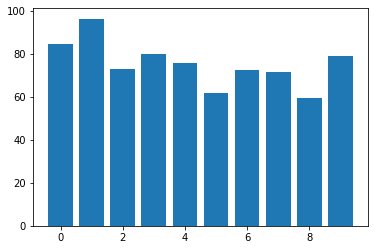

In [38]:
plt.bar(*zip(*acc_of.items()))
plt.show()

# Thank for watching